In [31]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import sys
import os
import json
import re
import nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ['CUDA_VISIBLE_DEVICES']='1'
pd.set_option('display.max_colwidth', None)
sys.path.append('/workspace/computationally-undermining-arguments/src-py/')
sys.path.append('/workspace/computationally-undermining-arguments/scripts/')

In [39]:
%autoreload

import utility

### Data Preparation:

### Old data:

In [6]:
training_df =  pd.read_json("/workspace/ceph_data/argument-undermining/data/gen_training.json")
valid_df =  pd.read_json("/workspace/ceph_data/argument-undermining/data/gen_validation.json")

In [7]:
training_df = clean_df(training_df)
valid_df = clean_df(valid_df)

In [74]:
comment_lengths = training_df.full_comment.apply(lambda x: len(nltk.word_tokenize(" ".join(x))))

In [75]:
print(np.mean(comment_lengths))

81.5188192207563


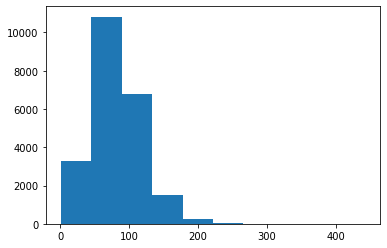

In [77]:
import matplotlib.pyplot as plt
plt.hist(comment_lengths)
plt.show()

In [79]:
training_data1 = prepare_data_for_training({'train': training_df, 'valid': valid_df})
json.dump(training_data1, open('/workspace/ceph_data/argument-undermining/data/gpt_data/baseline_data.json', 'w'))

In [ ]:
len(training_data1['train'])

### Jo Data:

No need to this section anymore, because the data is generated from the notebook training_gpt2.ipynb for both baseline and the approach...

In [26]:
jo_df =  pd.read_pickle("/workspace/ceph_data/argument-undermining/jo_data/gen_data.pickle")

In [27]:
training_df = jo_df[jo_df.split =='train']
valid_df = jo_df[jo_df.split =='val']

In [40]:
training_df = utility.clean_df(training_df)
valid_df    = utility.clean_df(valid_df)

/workspace/computationally-undermining-arguments/src-py/utility.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[post_clm] = df[post_clm].apply(lambda x : [sent.strip().lower() for sent in x])
/workspace/computationally-undermining-arguments/src-py/utility.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[comment_clm] = df[comment_clm].apply(lambda x : [sent.strip().lower() for sent in x])
/workspace/computationally-undermining-arguments/src-py/utility.py:19: SettingWithCopyWarning: 
A value is

In [48]:
jo_training = utility.prepare_data_for_training({'train': training_df, 'valid': valid_df[0:5000]},
                                                full_counter=False, context='title+post', 
                                                post_clm='post', 
                                                comment_clm='comment_sents', 
                                                attacks_clm='premise_counter_premise_pairs', max_sens=20, baseline=True)

In [49]:
len(jo_training['train'])

53558

In [50]:
len(jo_training['valid'])

5000

In [51]:
json.dump(jo_training, open('/workspace/ceph_data/argument-undermining/data/gpt_data/jo_baseline_data.json', 'w'))

### Training GPT2:

In [ ]:
!CUDA_VISIBLE_DEVICES=3 python3 /workspace/computationally-undermining-arguments/thirdparty/transfer-learning-conv-ai/train.py \
                    --dataset_path /workspace/ceph_data/argument-undermining/data/gpt_data/jo_data.json \
                    --model_checkpoint openai-gpt \
                    --log_dir /workspace/ceph_data/argument-undermining/models/gen_models/ \
                    --baseline \
                    --dataset_cache ./jo_data_cache \
                    --output_model_checkpoint jo_baseline_gpt \
                    --num_candidates 2 \
                    --train_batch_size 1 \
                    --valid_batch_size 1 \
                    --lr 6.25e-5 \
                    --n_epochs 6

2020-12-10 21:47:11.490665: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
INFO:/workspace/computationally-undermining-arguments/thirdparty/transfer-learning-conv-ai/train.py:Arguments: Namespace(baseline=True, build_instance_version=None, dataset_cache='./jo_data_cache', dataset_path='/workspace/ceph_data/argument-undermining/data/gpt_data/jo_data.json', device='cuda', eval_before_start=False, fp16='', gradient_accumulation_steps=8, lm_coef=1.0, local_rank=-1, log_dir='/workspace/ceph_data/argument-undermining/models/gen_models/', lr=6.25e-05, max_history=2, max_norm=1.0, mc_coef=1.0, model_checkpoint='openai-gpt', n_epochs=6, num_candidates=2, output_model_checkpoint='jo_baseline_gpt', personality_permutations=1, premise_extra=False, train_batch_size=1, valid_batch_size=1)
INFO:/workspace/computationally-undermining-arguments/thirdparty/transfer-learning-conv-ai/train.py:Prepare tokenizer, pretrained model and opt